# Importar biblioteca

In [71]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string
from textblob import TextBlob
from nltk.tokenize import word_tokenize

# download de stopwords de nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Desktop\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Organizar DataFrame

In [72]:
df1 = pd.read_excel('WheyWords.xlsx')
df1 = df1.rename(columns={'Title': 'Reviews'})
df1 = df1.dropna(subset='Reviews').reset_index(drop=True)
df1.to_csv('WheyWords_Reedit.csv')

# Análise de sentimento

In [73]:
df_reddit = pd.read_csv('WheyWords_Reedit.csv',usecols=['Reviews'])
df_reddit = pd.DataFrame(df_reddit)
df_reddit

,Reviews
0,Discover Food that Contains Iron- 10 Delicious...
1,Is Women’s Best protein and supplements actual...
2,Unflavored protein powder / isolate?
3,When to intake protein for weight loss
4,Optimum Nutrition best flavors?
...,...
940,Too much sodium in my protein?
941,What is going on with P28 bread?!?!?!
942,I'm 15 60kg 5'8
943,Which one is the best protein Powder in 2020?


In [74]:
df_reddit['Sentiment'] = df_reddit['Reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [75]:
#Criar a função para idetificar se a polaridade é positivo, neutro ou negativo
def polaridade(nota):
    if nota > 0:
        return (1, 'Positivo')
    elif nota < 0:
        return (-1, 'Negativo')
    else:
        return (0, 'Neutro')
    
# Adicionar tanto a polaridade em número quanto em texto em uma nova coluna
df_reddit[['polaridade_num', 'polaridade_texto']] = df_reddit['Sentiment'].apply(polaridade).apply(pd.Series)
df_reddit

,Reviews,Sentiment,polaridade_num,polaridade_texto
0,Discover Food that Contains Iron- 10 Delicious...,1.00,1,Positivo
1,Is Women’s Best protein and supplements actual...,0.85,1,Positivo
2,Unflavored protein powder / isolate?,0.00,0,Neutro
3,When to intake protein for weight loss,0.00,0,Neutro
4,Optimum Nutrition best flavors?,0.85,1,Positivo
...,...,...,...,...
940,Too much sodium in my protein?,0.20,1,Positivo
941,What is going on with P28 bread?!?!?!,0.00,0,Neutro
942,I'm 15 60kg 5'8,0.00,0,Neutro
943,Which one is the best protein Powder in 2020?,1.00,1,Positivo


In [76]:
df_reddit.to_csv('df_reddit_sentiment.csv')

## Contagem de polaridade

In [77]:
df1= pd.read_csv('df_reddit_sentiment.csv')
df1

,Unnamed: 0,Reviews,Sentiment,polaridade_num,polaridade_texto
0,0,Discover Food that Contains Iron- 10 Delicious...,1.00,1,Positivo
1,1,Is Women’s Best protein and supplements actual...,0.85,1,Positivo
2,2,Unflavored protein powder / isolate?,0.00,0,Neutro
3,3,When to intake protein for weight loss,0.00,0,Neutro
4,4,Optimum Nutrition best flavors?,0.85,1,Positivo
...,...,...,...,...,...
940,940,Too much sodium in my protein?,0.20,1,Positivo
941,941,What is going on with P28 bread?!?!?!,0.00,0,Neutro
942,942,I'm 15 60kg 5'8,0.00,0,Neutro
943,943,Which one is the best protein Powder in 2020?,1.00,1,Positivo


In [78]:
positive_reddit = df1[df1['polaridade_texto'] == 'Positivo'].shape[0]
negative_reddit = df1[df1['polaridade_texto'] == 'Negativo'].shape[0]
neutral_reddit = df1[df1['polaridade_texto'] == 'Neutro'].shape[0]

print("Quantidade de sentimento positivo:", positive_reddit)
print("Quantidade de sentimento negativo:", negative_reddit)
print("Quantidade de sentimento neutro:", neutral_reddit)

Quantidade de sentimento positivo: 351
Quantidade de sentimento negativo: 88
Quantidade de sentimento neutro: 506


# Frequencia de palavras
**DESAFIO**
palavras/termos com alta frequência, mas em um contexto negativo para o público-alvo

In [79]:
df_neg = df1.loc[(df1['polaridade_texto']=='Negativo')]
df_neg

,Unnamed: 0,Reviews,Sentiment,polaridade_num,polaridade_texto
11,11,doesn't anyone make just plain whey protein wi...,-0.214286,-1,Negativo
12,12,Why was this shake so awful?,-1.000000,-1,Negativo
35,35,Recommendation of an additive-free / low-addit...,-0.062500,-1,Negativo
36,36,I'm tired of lumpy shakes.,-0.400000,-1,Negativo
40,40,I'm confused on the size of the scoop of my pr...,-0.400000,-1,Negativo
...,...,...,...,...,...
900,900,Protein heavy meals?,-0.200000,-1,Negativo
915,915,I got a question. I’m buying the Gatorade Prot...,-0.093750,-1,Negativo
920,920,I’ve been using Premier Protein as a supplemen...,-0.233333,-1,Negativo
937,937,Odd question alert - Whey powder and porridge/...,-0.166667,-1,Negativo


In [80]:
# Carregar stopword em ingles
stop_words_en = set(stopwords.words('english'))

# Adiciona stop words adicionais
additional_stop_words = ["'s", "oh", "https","’","''","“","...","”","``","1","2"]
stop_words_en.update(additional_stop_words)

# Carregar stopword em português
stop_words_pt = set(stopwords.words('portuguese'))

In [81]:
# Junte todas as reviews em um único texto
reddit_text = ' '.join(df_neg['Reviews'].astype(str))

# Tokenize o texto em palavras
tokens = word_tokenize(reddit_text)

# Filtra as palavras para remover stopwords e pontuações
reddit_words = [word.lower() for word in tokens if word.lower() not in stop_words_en and word.lower() not in stop_words_pt and word.lower() not in string.punctuation]

# Conta a frequência das palavras
reddit_word_freq = Counter(reddit_words)

In [82]:
df_wordfreq_reddit = pd.DataFrame.from_dict(reddit_word_freq, orient='index', columns=['Count']).reset_index()
df_wordfreq_reddit.columns = ['Palavra', 'Frequência']
display(df_wordfreq_reddit)

,Palavra,Frequência
0,n't,4
1,anyone,5
2,make,4
3,plain,1
4,whey,11
...,...,...
373,look,1
374,strange,1
375,gon,1
376,die,1


In [83]:
df_wordfreq_reddit = df_wordfreq_reddit.sort_values(by=['Frequência']).tail(20)
display(df_wordfreq_reddit)
#df_wordfreq_reddit.to_csv('df_wordfreqNEGATIVE_reddit.csv')

,Palavra,Frequência
11,awful,4
69,days,4
0,n't,4
40,muscle,4
47,tried,4
144,im,4
217,breast,4
1,anyone,5
17,'m,5
156,bars,5


### Nuvem de palavras

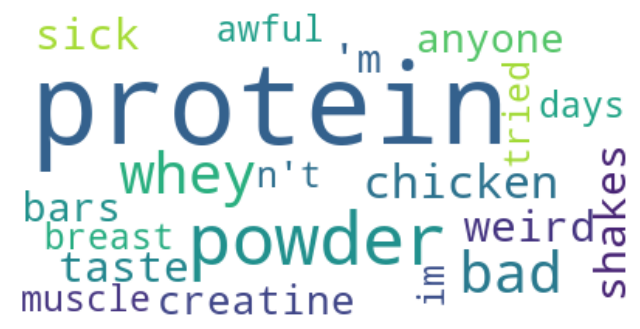

In [84]:
word_freq_dict = df_wordfreq_reddit.set_index('Palavra')['Frequência'].to_dict()

wordcloud = WordCloud(background_color='white').generate_from_frequencies(word_freq_dict)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()